<a href="https://colab.research.google.com/github/lyuguang/COMP90054/blob/main/solution_set_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP90054 AI Planning for Autonomy
### Problem Set 07
 - Markov Decision Processes




### Key concepts:
- MRP
- MDP



---


### Problem 1:


Consider the following Grid MDP example:

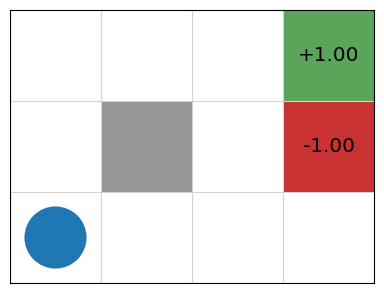

An agent is in the bottom left cell of a grid. The grey cell is a wall. The two coloured cells give a reward. There is a reward of 1 of being in the top-right (green) cell, but a negative value of -1 for the cell immediately below (red).

But! Things can go wrong — sometimes the effects of the actions are not what we want:
- If the agent tries to move north, 80% of the time, this works as planned (provided the wall is not in the way)
- 10% of the time, trying to move north takes the agent west (provided the wall is not in the way);
- 10% of the time, trying to move north takes the agent east (provided the wall is not in the way)
If the wall is in the way of the cell that would have been taken, the agent stays in the current cell


Define a formal discounted-reward MDP model which matches this description. (Hint: you may wish to sketch out a small part of the MDP first).

### Answer:
MDP = $(S, A, P, R, \gamma)$
#### State space:
The only thing that changes from state to state is the position of the agent, so we can represent the entire state simply by the x,y coordinates. i.e. $S = {(x,y) | x\in[0,1,2,3], y \in [0,1,2]}$. Here we assume the bottom left corner is (0,0), but other conventions are equally valid.

#### Action space:
A = {North, East, South, West}

#### Transition function:
To specify this formally is a bit complex. The key idea is that for each direction, the transition function looks roughly like this:
- $P((x,y+1) | (x, y), North) = 0.8$
- $P((x+1,y) | (x, y), North) = 0.1$
- $P((x-1,y) | (x, y), North) = 0.1$

Now, this is neglecting the existance of walls and borders, which makes things tricky. To do it comprehensively, a state-by-state definition is probably required, e.g. for $(0,0)$ alone:

- $P((0,1) | (0, 0), North) = 0.8$
- $P((1,0) | (0, 0), North) = 0.1$
- $P((0,0) | (0, 0), North) = 0.1$
- $P((1,0) | (0, 0), East) = 0.8$
- $P((0,0) | (0, 0), East) = 0.1$
- $P((0,1) | (0, 0), East) = 0.1$
- $P((0,0) | (0, 0), South) = 0.9$
- $P((1,0) | (0, 0), South) = 0.1$
- $P((0,0) | (0, 0), West) = 0.9$
- $P((0,1) | (0, 0), West) = 0.1$

#### Rewards:
This is slightly complicated depending on the precise formalism used. If we take rewards to be a property of a full state-action-next state triple, then the formula is simple
$R(s,a,s')= \begin{cases}
1 &  \text{for }s'=(3,2)\\
-1 & \text{for }s'=(3,1)\\
0 & \text{otherwise}
\end{cases}$

However, in the notes we say that the reward is determined purely by $R(s,a)$. This poses problems what should $R((2,2),East)$ be? The reward of 1 should only be given if the agent successsully goes to $(3,2)$, but this only happens with probability 0.8. To get around this, we need to introduce a new state: $End$ and a new action $Terminate$, which is only available in states $(3,2), (3,1)$. Then we can say:

$R((3,2),Terminate)=1$

$R((3,1),Terminate)=-1$

$P((3,2),Terminate,End)=1$

$P((3,1),Terminate,End)=1$

#### Discount factor ($\gamma$)
Nothing in the description tells us what this value should be, but a value of 1 would not incentivise the agent to reach the goal quickly, since the reward would be the same regardless of how long it took to reach the goal. Any value $0 < \gamma < 1$ would be acceptable, but consider how the optimal policy might change for different values...

### Problem 2:

A. Compare the value functions for the Markov Reward Process and Markov Decision process shown below. Why are they different? Is there a different policy for the MDP which would result in the same values as shown in the MRP?


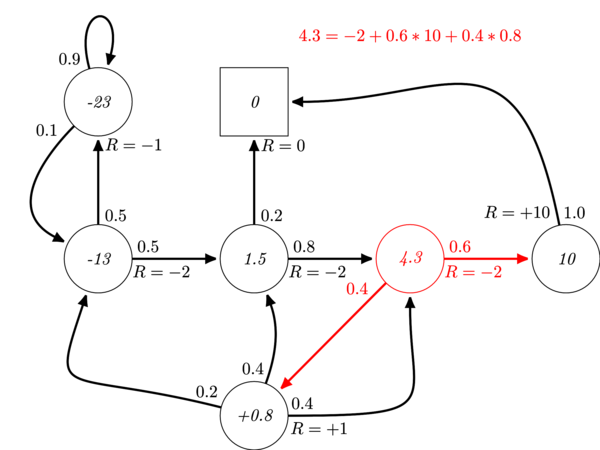
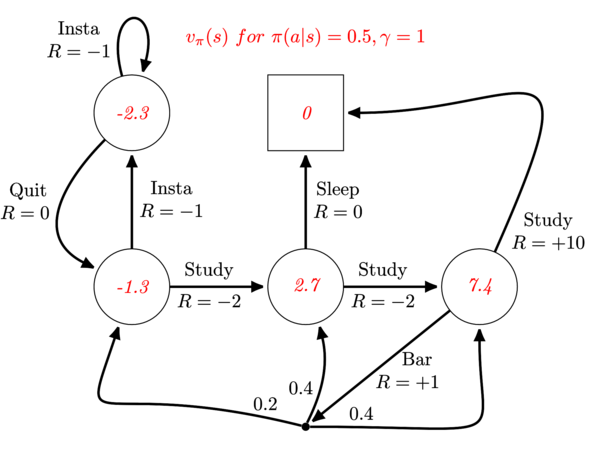





B. Now compare the values to the optimal value function. Why are they different?

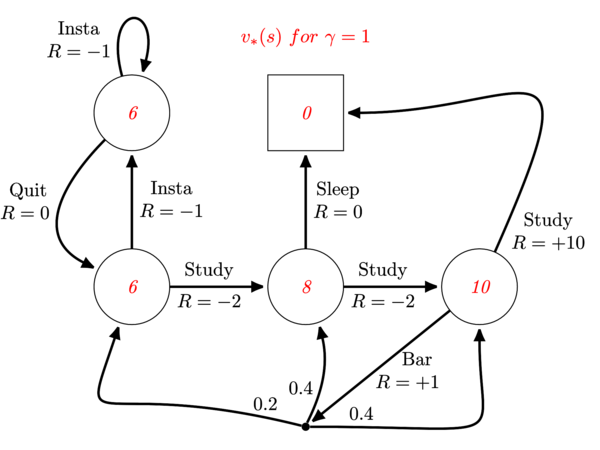


### Answer:
#### A.
The differences in values is largely due to the differences in probabilities associated with each action, but there are some subtleties. For example, the top right state is -23 in the MRP, since the probability of staying there and getting another -1 reward is high (90%). Whereas in the MDP, the actions Quit and Insta are equally likely, so the value of being in Insta is higher as it is more likely we can escape before accruing too much negative reward.

If your policy for the MDP matched the probabilities given in the MRP, then the values would largely match, but the difference between rewards on actions in the MDP vs rewards on states in the MRP means there isn't a perfect 1-1 correspondance between the two models (e.g. note the additional 2 states in the MRP).
Rewards in an MDP can be associated with states or actions, and these are equivalently powerful (any MDP with reward on actions can be translated into an MDP with rewards on states only), but actions is generally nicer to work with.

#### B.
The optimal value function is different from the prior MDP due to the probabilities of selecting different actions. E.g. in the bottom right state, the optimal policy will always choose to study, and never go to the bar, whereas the prior one was 50/50. This impacts the values, since studying gives higher average reward.



---


### Problem 3:




Given the optimal state value function above, what is the optimal action to take in the bottom left state? What about the rightmost state? How can you tell?

### Answer:

In the bottom left state, it is clear that it's better to Study than to go on Instagram, because the immediate reward + value of the next state is higher. But for the bottom right state, it is not as clear.

Since there effect of going to the bar is probabilistic, we can't just compare two numbers and choose the higher one.  Instead in order to know which action is best we would need to know the full probabilistic model of the MDP. In general if you don't know the model, then state-values are not sufficient to extract a policy. This motivates Q-values and explains why we do Q-learning in RL and not "V-learning".